jpg_images has 25 items.
images_with_captions_inside has 25 items.
About to call create_storybook.


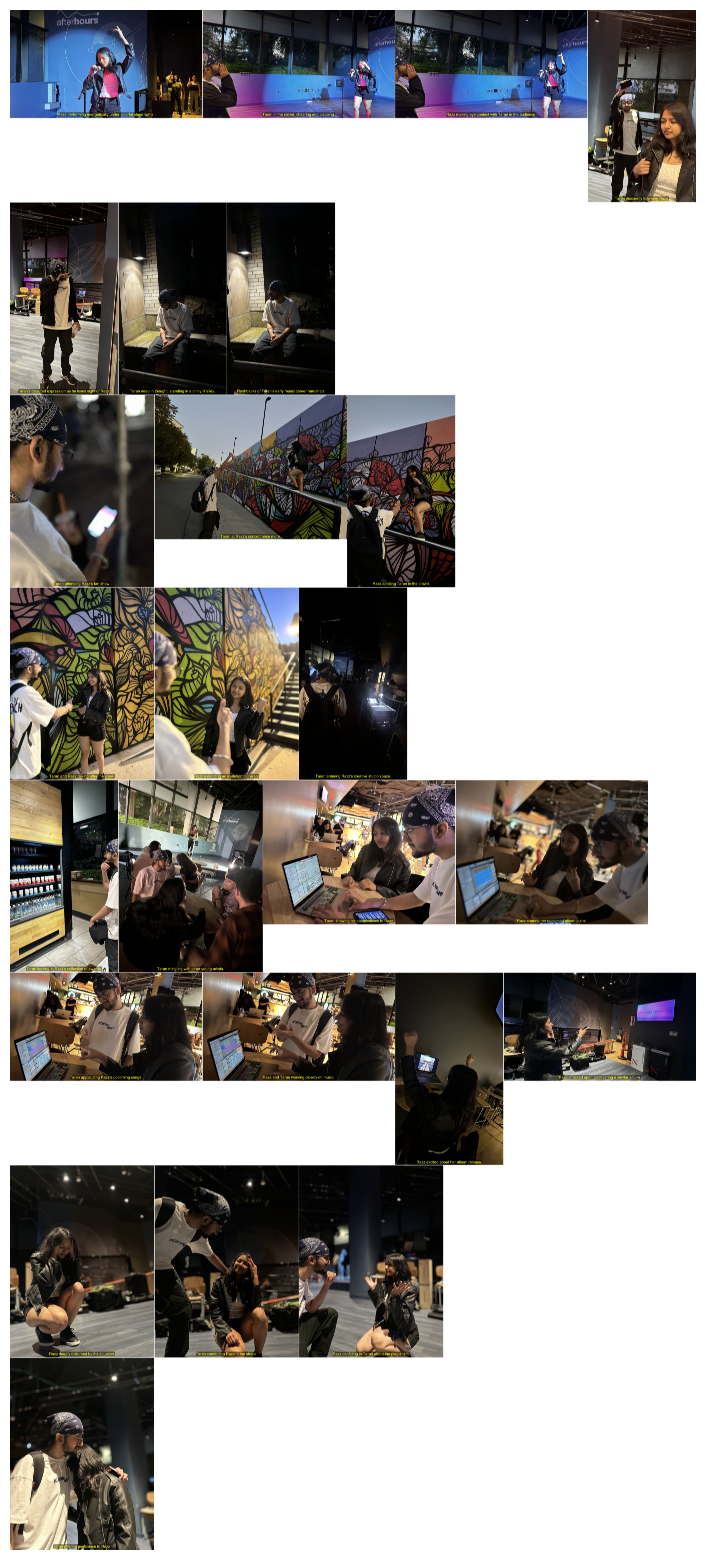

In [19]:
from PIL import Image, ImageDraw, ImageFont
from pillow_heif import register_heif_opener
import os
import matplotlib.pyplot as plt
import random
import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)


# Register HEIF opener for PIL
register_heif_opener()

# Convert HEIC images in the 'Act1' folder to JPG
act1_folder = 'Act1'
jpg_folder = 'Act1_JPG'
os.makedirs(jpg_folder, exist_ok=True)

# Filter out only .HEIC files and sort filenames numerically
heic_filenames = [f for f in os.listdir(act1_folder) if f.endswith('.HEIC')]
filenames = sorted(heic_filenames, key=lambda x: int(x.split('.')[0]))

for filename in filenames:
    heic_path = os.path.join(act1_folder, filename)
    jpg_path = os.path.join(jpg_folder, filename.replace('.HEIC', '.jpg'))
    convert_heic_to_jpg(heic_path, jpg_path)

# Load converted JPG images in sorted order
jpg_images = [Image.open(os.path.join(jpg_folder, filename)) for filename in sorted(os.listdir(jpg_folder), key=lambda x: int(x.split('.')[0].replace('Scene ', '')))]


# Add caption with specific style
def add_caption_and_dialogue_inside(image, caption, dialogue):
    img = image.convert('RGBA')
    d = ImageDraw.Draw(img)
    fnt = ImageFont.truetype("arial.ttf", 80)

    # Calculate text dimensions
    text_w, text_h = d.textsize(caption, font=fnt)
    x = (img.width - text_w) // 2
    y = img.height - text_h - 30

    # Create rectangle overlay
    overlay = Image.new('RGBA', img.size, (0, 0, 0, 0))
    draw_overlay = ImageDraw.Draw(overlay)
    draw_overlay.rectangle([(x, y), (x + text_w, y + text_h)], fill=(0, 0, 0, 128))

    # Merge overlay and original image
    img = Image.alpha_composite(img, overlay)

    # Add text
    d = ImageDraw.Draw(img)
    d.text((x, y), caption, font=fnt, fill=(255, 255, 0))

    return img

scenes = [
    {'caption': 'Razz performing energetically under colorful stage lights.', 'dialogue': '(Audience cheering)'},
    {'caption': 'Taran in the crowd, cheering and clapping.', 'dialogue': '(Taran shouting: "You\'re amazing, Razz!")'},
    {'caption': 'Razz making eye contact with Taran in the audience.', 'dialogue': '(Razz smiles)'},
    {'caption': 'Taran discreetly following Razz.', 'dialogue': '(Taran whispering: "I need a picture with her.")'},
    {'caption': 'Taran\'s dejected expression as he loses sight of Razz.', 'dialogue': '(Taran sighs)'},
    {'caption': 'Taran deep in thought, standing in a dimly lit alley.', 'dialogue': '"Is this path worth it?"'},
    {'caption': 'Flashbacks of Taran\'s early music career hardships.', 'dialogue': '(Voiceover of Taran\'s reflections)'},
    {'caption': 'Taran attending Razz\'s fan show.', 'dialogue': '"I won\'t give up."'},
    {'caption': 'Taran at Razz\'s concert once more.', 'dialogue': '"She has to notice me."'},
    {'caption': 'Razz spotting Taran in the crowd.', 'dialogue': '(Razz raises an eyebrow)'},
    {'caption': 'Taran and Razz talking after the show.', 'dialogue': '"Your music inspires me."'},
    {'caption': 'Razz extending an invitation to Taran.', 'dialogue': '"Come visit my studio."'},
    {'caption': 'Taran entering Razz\'s creative studio space.', 'dialogue': '(Taran\'s amazement)'},
    {'caption': 'Taran looking at Razz\'s collection of awards.', 'dialogue': '"You\'ve achieved so much."'},
    {'caption': 'Taran mingling with other young artists.', 'dialogue': '"The competition is fierce."'},
    {'caption': 'Taran showing his compositions to Razz.', 'dialogue': '"What do you think?"'},
    {'caption': 'Razz sharing her upcoming album plans.', 'dialogue': '"This is a secret project."'},
    {'caption': 'Taran applauding Razz\'s upcoming songs.', 'dialogue': '"They\'re incredible!"'},
    {'caption': 'Razz and Taran working closely on music.', 'dialogue': '(Music fills the studio)'},
    {'caption': 'Razz excited about her album release.', 'dialogue': '"It\'s finally here!"'},
    {'caption': 'Razz shocked upon discovering a similar album.', 'dialogue': '"This can\'t be happening."'},
    {'caption': 'Razz deeply disturbed by the situation.', 'dialogue': '(Razz looks troubled)'},
    {'caption': 'Taran comforting Razz in the studio.', 'dialogue': '"What\'s wrong?"'},
    {'caption': 'Razz confiding in Taran about the plagiarism.', 'dialogue': '"I don\'t know what to do."'},
    {'caption': 'Taran offering assistance to Razz.', 'dialogue': '"We\'ll find out who did this together."'}
]
# Check if jpg_images list is populated correctly
if not jpg_images:
    print("jpg_images is empty.")
else:
    print(f"jpg_images has {len(jpg_images)} items.")

# Check if images_with_captions_inside is empty before calling create_storybook
if not images_with_captions_inside:
    print("images_with_captions_inside is empty.")
else:
    print(f"images_with_captions_inside has {len(images_with_captions_inside)} items.")


# Add captions to images
images_with_captions_inside = [add_caption_and_dialogue_inside(img.copy(), scene['caption'], scene['dialogue']) for img, scene in zip(jpg_images, scenes)]

def create_storybook(images, line_min=3, line_max=5, margin=10):
    lines = []
    line = []
    line_width = 0
    line_height = 0
    
    for img in images:
        img_copy = img.copy()  # Create a copy to avoid repetition
        line.append(img_copy)
        line_width += img_copy.width
        line_height = max(line_height, img_copy.height)
        
        if len(line) >= line_max or (len(line) >= line_min and random.choice([True, False])):
            new_line = Image.new('RGB', (line_width + margin * (len(line) - 1), line_height), color=(255, 255, 255))
            x_offset = 0
            for img in line:
                new_line.paste(img, (x_offset, 0))
                x_offset += img.width + margin  # Add margin after each image
            lines.append(new_line)
            
            # Reset line variables
            line = []
            line_width = 0
            line_height = 0

    # Handle any remaining images that didn't form a complete line
    if line:
        new_line = Image.new('RGB', (line_width + margin * (len(line) - 1), line_height), color=(255, 255, 255))
        x_offset = 0
        for img in line:
            new_line.paste(img, (x_offset, 0))
            x_offset += img.width + margin
        lines.append(new_line)
    
    # Create the final storybook image
    total_width = max(line.width for line in lines)
    total_height = sum(line.height for line in lines) + margin * (len(lines) - 1)
    storybook = Image.new('RGB', (total_width, total_height), color=(255, 255, 255))
    y_offset = 0
    for line in lines:
        storybook.paste(line, (0, y_offset))
        y_offset += line.height + margin
    
    return storybook


# About to call create_storybook
print("About to call create_storybook.")
storybook = create_storybook(images_with_captions_inside)

if storybook:
    plt.figure(figsize=(10, 20))
    plt.imshow(np.array(storybook))
    plt.axis('off')
    plt.show()
    storybook.save("Act1.jpg")
else:
    print("No storybook was created.")
